In [1]:
#Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0.数据载入（Load Data）

In [4]:
#load dataset
# source: https://archive.ics.uci.edu/ml/datasets/wine+quality
df=pd.read_csv('C:/Users/Admin/Desktop/教学规划/RedwineQuality/winequality-red.csv', sep=';', quotechar='"')

# 1.探索性分析（Exploratory Analysis）
掌握数据的基本情况：
数据量
特征数
目标变量
数据类型（整数、浮点数等）
取值范围（最大值、最小值、平均值、中位值等）
数值分布
相关度

In [8]:
#head samples
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Describe the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

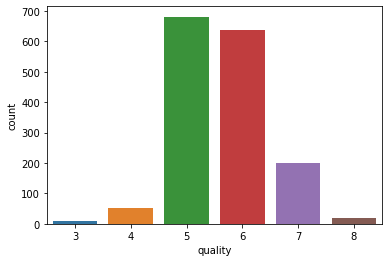

In [9]:
#count of the target variable
sns.countplot(x='quality',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

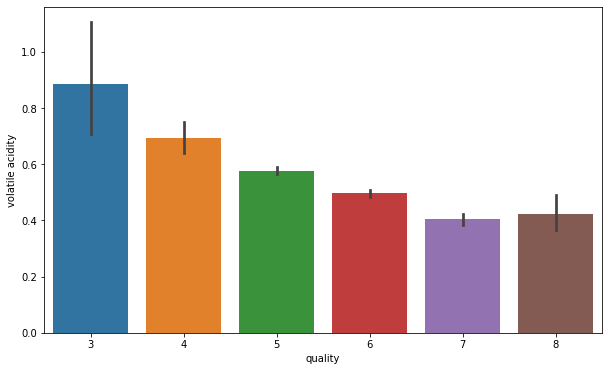

In [11]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=df)

# 2.预处理（Preprocessing）
目标：品质分类（好/不好）

In [14]:
#Classified into two categories:tasty/not tasty
def isTasty(quality):
    if quality>=6.5:
        return 1
    else: 
        return 0

In [15]:
df['tasty']=df['quality'].apply(isTasty)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tasty'],
      dtype='object')

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tasty
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [17]:
df['tasty'].value_counts()

0    1382
1     217
Name: tasty, dtype: int64

特征值X和目标值Y

In [19]:
#Now seperate the dataset as target variable and feature variables
x=df.drop(['quality','tasty'],axis=1)
y=df['tasty']

In [20]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: tasty, dtype: int64

In [23]:
y.value_counts()

0    1382
1     217
Name: tasty, dtype: int64

数据集合拆分：训练train、验证

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.33,random_state=123)

In [26]:
print('x_train.shape:',x_train.shape)
print('x_val.shape:',x_val.shape)
print('y_train.shape:',y_train.shape)
print('y_val.shape:',y_val.shape)

x_train.shape: (1071, 11)
x_val.shape: (528, 11)
y_train.shape: (1071,)
y_val.shape: (528,)


数据标准化

In [31]:
from sklearn.preprocessing import StandardScaler
# Applying Standard scaling to get optimized result
sc = StandardScaler()

In [32]:
x_train=sc.fit_transform(x_train)
x_val=sc.fit_transform(x_val)

# 模型选择与训练（Model Selection and Training）

随机森林分类器： https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=200)

In [35]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

# 模型预测（Predict）

In [36]:
y_pred=rfc.predict(x_val)

# 性能指标（Performance Matrics）

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [39]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_val,y_pred))

[[450   8]
 [ 41  29]]


In [40]:
#Accuracy score
print(accuracy_score(y_val,y_pred))

0.9071969696969697


In [42]:
print(rfc.score(x_val,y_val))

0.9071969696969697


In [43]:
# classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       458
           1       0.78      0.41      0.54        70

    accuracy                           0.91       528
   macro avg       0.85      0.70      0.75       528
weighted avg       0.90      0.91      0.89       528

